<a href="https://colab.research.google.com/github/987654-00/S4DS-FIFA-EDA-and-Model/blob/main/FIFA17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('FIFA17_official_data.csv')

In [7]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17560 non-null  int64  
 1   Name                      17560 non-null  object 
 2   Age                       17560 non-null  int64  
 3   Photo                     17560 non-null  object 
 4   Nationality               17560 non-null  object 
 5   Flag                      17560 non-null  object 
 6   Overall                   17560 non-null  int64  
 7   Potential                 17560 non-null  int64  
 8   Club                      17317 non-null  object 
 9   Club Logo                 17560 non-null  object 
 10  Value                     17560 non-null  object 
 11  Wage                      17560 non-null  object 
 12  Special                   17560 non-null  int64  
 13  Preferred Foot            17560 non-null  object 
 14  Intern

In [9]:
df=df.drop(columns=['Club Logo','Photo','ID','Flag'],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      17560 non-null  object 
 1   Age                       17560 non-null  int64  
 2   Nationality               17560 non-null  object 
 3   Overall                   17560 non-null  int64  
 4   Potential                 17560 non-null  int64  
 5   Club                      17317 non-null  object 
 6   Value                     17560 non-null  object 
 7   Wage                      17560 non-null  object 
 8   Special                   17560 non-null  int64  
 9   Preferred Foot            17560 non-null  object 
 10  International Reputation  17560 non-null  float64
 11  Weak Foot                 17560 non-null  float64
 12  Skill Moves               17560 non-null  float64
 13  Work Rate                 17560 non-null  object 
 14  Body T

In [11]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,L. Suárez,29,Uruguay,92,92,FC Barcelona,€83M,€525K,2291,Right,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,R. Nainggolan,28,Belgium,86,86,Roma,€37.5M,€130K,2290,Right,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,A. Vidal,29,Chile,87,87,FC Bayern München,€41.5M,€180K,2285,Right,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,D. Alaba,24,Austria,86,89,FC Bayern München,€41.5M,€140K,2279,Left,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,P. Pogba,23,France,88,94,Manchester United,€71.5M,€225K,2271,Right,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


In [12]:
df.isnull().mean()*100

,0
Name,0.000000
Age,0.000000
Nationality,0.000000
Overall,0.000000
Potential,0.000000
Club,1.383827
Value,0.000000
Wage,0.000000
Special,0.000000
Preferred Foot,0.000000


In [13]:
df=df.drop(columns=['Loaned From'], axis=1)

In [14]:
df = df.dropna(subset=['Club','Contract Valid Until','Joined'])

In [15]:
df.isnull().mean()*100

,0
Name,0.0
Age,0.0
Nationality,0.0
Overall,0.0
Potential,0.0
Club,0.0
Value,0.0
Wage,0.0
Special,0.0
Preferred Foot,0.0


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df['Value'].unique()

array(['€83M', '€37.5M', '€41.5M', '€71.5M', '€72M', '€20.5M', '€14.5M',
       '€54M', '€87M', '€35M', '€4.8M', '€31.5M', '€12.5M', '€18.5M',
       '€29.5M', '€15.5M', '€24M', '€30M', '€20M', '€23.5M', '€5.5M',
       '€18M', '€14M', '€11.5M', '€10M', '€19M', '€55M', '€26.5M', '€25M',
       '€46M', '€13M', '€23M', '€32.5M', '€21M', '€52M', '€39M', '€10.5M',
       '€17M', '€89M', '€9.5M', '€50.5M', '€22.5M', '€6.5M', '€7M',
       '€28.5M', '€43.5M', '€39.5M', '€7.5M', '€65.5M', '€15M', '€16M',
       '€37M', '€9M', '€27.5M', '€22M', '€71M', '€4.9M', '€13.5M', '€36M',
       '€36.5M', '€58M', '€12M', '€11M', '€16.5M', '€31M', '€2.7M',
       '€27M', '€3.9M', '€8M', '€8.5M', '€59.5M', '€3M', '€5M', '€3.3M',
       '€66.5M', '€24.5M', '€106M', '€3.1M', '€19.5M', '€42M', '€38.5M',
       '€4.1M', '€43M', '€47.5M', '€4.5M', '€3.4M', '€34M', '€2.4M',
       '€17.5M', '€625K', '€61.5M', '€4.2M', '€4.4M', '€56.5M', '€6M',
       '€3.8M', '€1.2M', '€4.7M', '€1.7M', '€2.3M', '€2.1M', '€3.2M'

In [18]:
def parse_value(val):
    if pd.isna(val):
        return None
    val = val.replace('€', '').upper().strip()

    multiplier = 1
    if val.endswith('M'):
        multiplier = 1000000
        val = val[:-1]
    elif val.endswith('K'):
        multiplier = 1000
        val = val[:-1]
    elif val.endswith('B'):
        multiplier = 1000000000
        val = val[:-1]


    return int(float(val) * multiplier)



In [19]:
df['Value']=df['Value'].apply(parse_value)
df['Wage']=df['Wage'].apply(parse_value)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15865 entries, 0 to 17559
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      15865 non-null  object 
 1   Age                       15865 non-null  int64  
 2   Nationality               15865 non-null  object 
 3   Overall                   15865 non-null  int64  
 4   Potential                 15865 non-null  int64  
 5   Club                      15865 non-null  object 
 6   Value                     15865 non-null  int64  
 7   Wage                      15865 non-null  int64  
 8   Special                   15865 non-null  int64  
 9   Preferred Foot            15865 non-null  object 
 10  International Reputation  15865 non-null  float64
 11  Weak Foot                 15865 non-null  float64
 12  Skill Moves               15865 non-null  float64
 13  Work Rate                 15865 non-null  object 
 14  Body Type  

In [21]:
df.shape

(15865, 58)

In [22]:
df['Joined']=pd.to_datetime(df['Joined'])
df['Contract Valid Until']=df['Contract Valid Until'].astype(int)

In [23]:
df['Weight']=df['Weight'].str.replace('lbs','').astype(int)


In [24]:
df['Height'] = df['Height'].str.split("'").apply(
    lambda x: (int(x[0]) * 12 + int(x[1])) * 2.54
)


In [25]:
# Finding the Player With Most Penalties
most_penalty=df.groupby('Name')['Penalties'].sum().sort_values(ascending=False).head(10)
most_penalty

,Penalties
Name,
J. Rodríguez,430.0
L. López,294.0
J. Jones,289.0
Wanderson,272.0
J. Sánchez,272.0
C. Rodríguez,267.0
M. González,255.0
L. Rodríguez,250.0
M. Dembélé,249.0


/tmp/ipython-input-2612476280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_penalty.index, y=most_penalty.values, palette='viridis')


Text(0.5, 1.0, 'Most Penalty Taker')

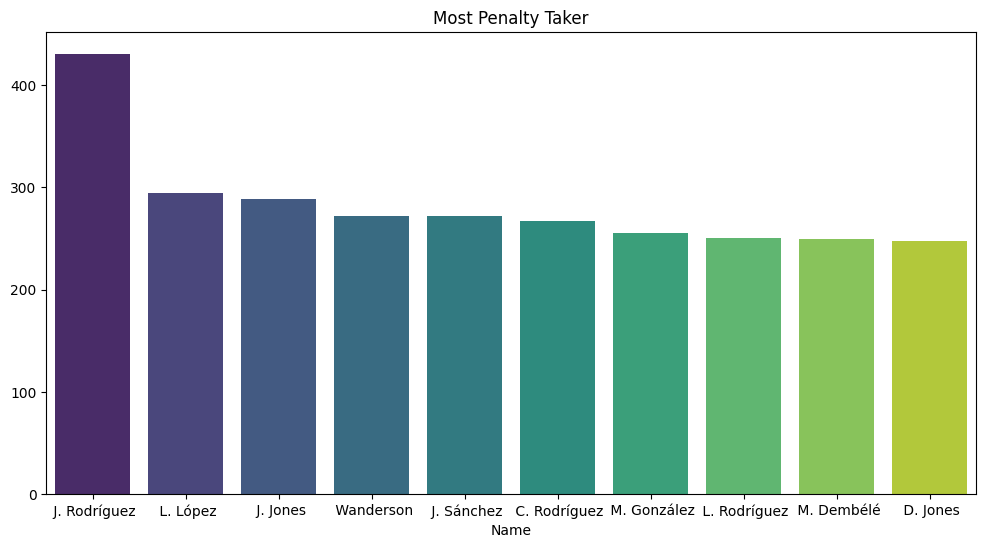

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=most_penalty.index, y=most_penalty.values, palette='viridis')
plt.title("Most Penalty Taker")

/tmp/ipython-input-3642507831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valueable_clubs.index, y=valueable_clubs.values, palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Real Madrid'),
  Text(1, 0, 'FC Barcelona'),
  Text(2, 0, 'FC Bayern München'),
  Text(3, 0, 'Manchester United'),
  Text(4, 0, 'Juventus'),
  Text(5, 0, 'Atlético Madrid'),
  Text(6, 0, 'Manchester City'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Paris Saint-Germain'),
  Text(9, 0, 'Chelsea')])

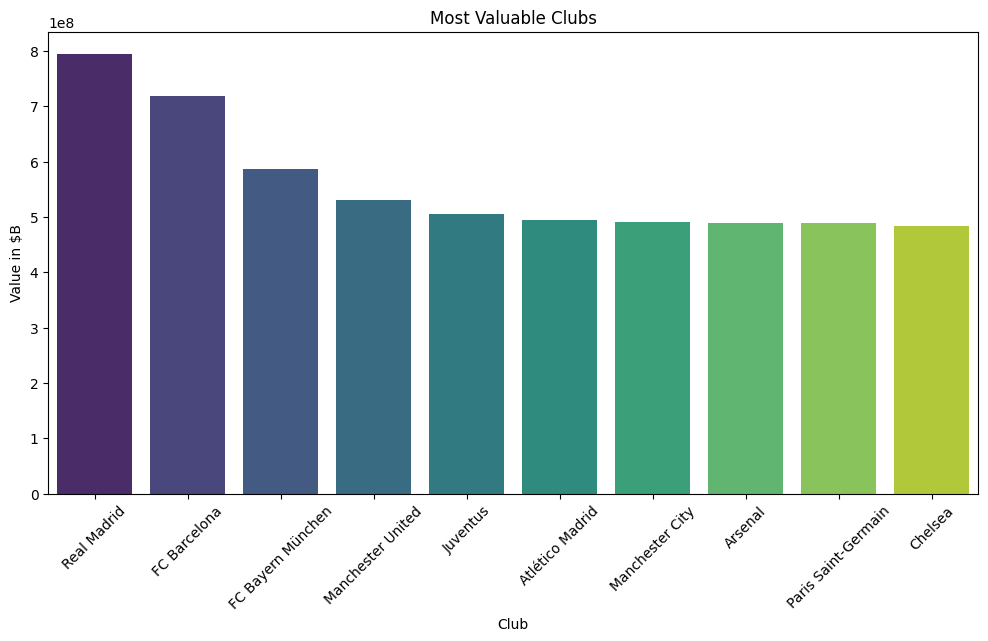

In [27]:
# Most Valuable Clubs Acc to Players Owned
valueable_clubs=df.groupby('Club')['Value'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=valueable_clubs.index, y=valueable_clubs.values, palette='viridis')
plt.title("Most Valuable Clubs")
plt.xlabel("Club")
plt.ylabel("Value in $B")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Most Valuable Player')

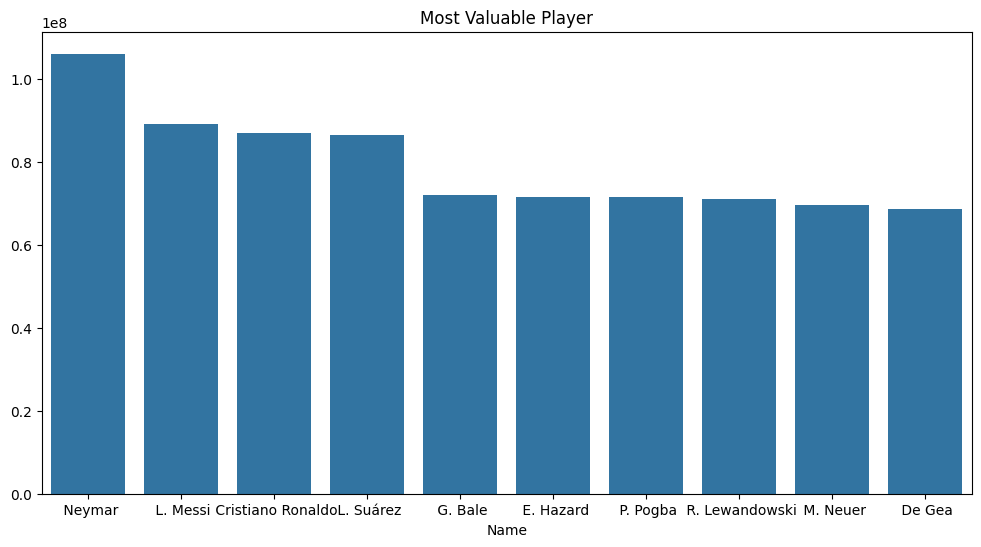

In [28]:
# Most Valuable Player
valued_player=df.groupby('Name')['Value'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=valued_player.index, y=valued_player.values)
plt.title("Most Valuable Player")

/tmp/ipython-input-1150895472.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_countries.index, y=player_countries.values, palette='viridis')


Text(0.5, 1.0, 'Most Player Countries')

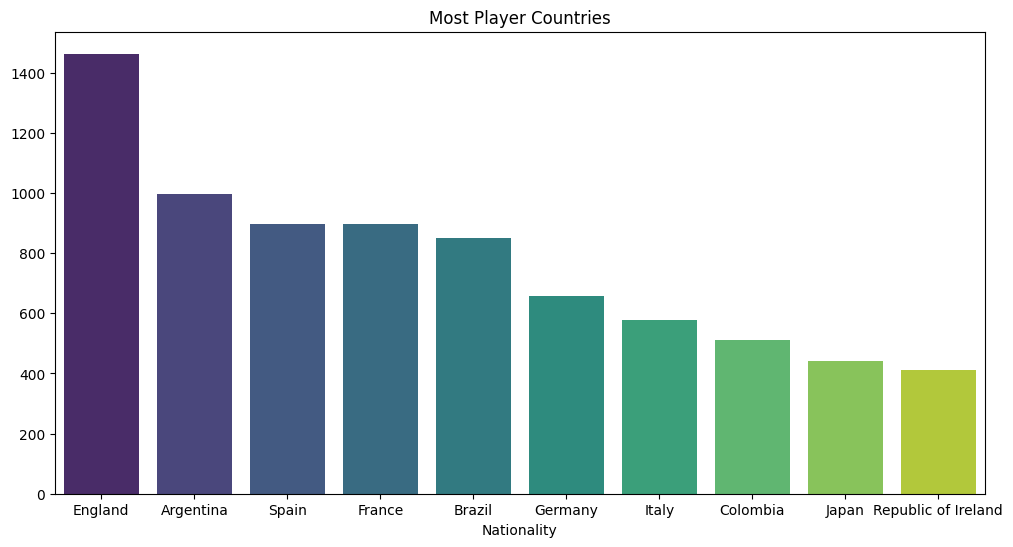

In [29]:
#Most Player Countries
player_countries=df['Nationality'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=player_countries.index, y=player_countries.values, palette='viridis')
plt.title("Most Player Countries")

<Axes: xlabel='Age'>

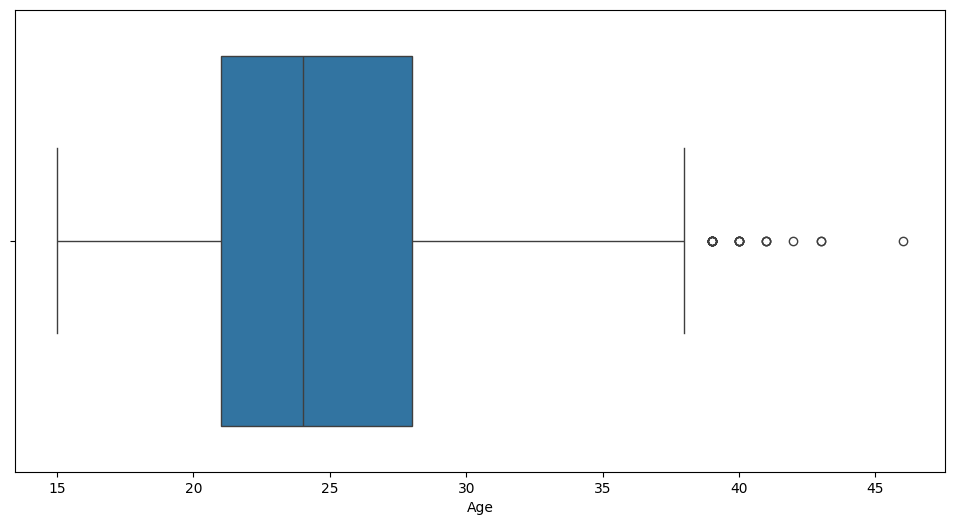

In [30]:
# Checking Outliers in Age
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Age'])

<Axes: xlabel='Value'>

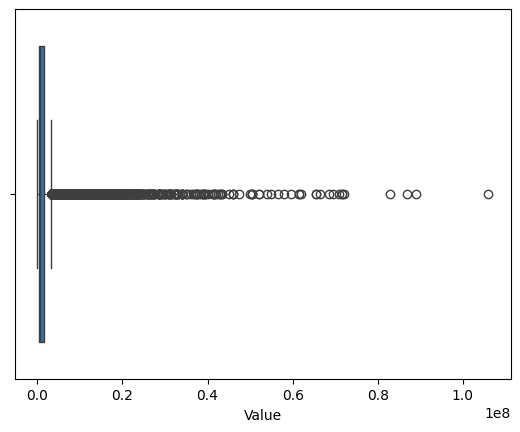

In [31]:
# Outliers in Player Value
sns.boxplot(x=df['Value'])

<Axes: xlabel='Overall', ylabel='Value'>

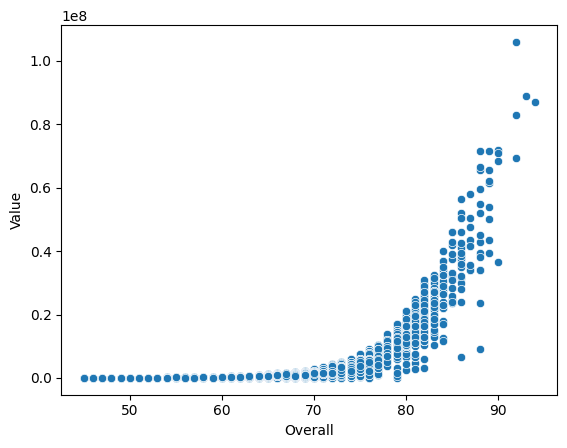

In [32]:
# Effect of Player Overall Score on Value
sns.scatterplot(x='Overall', y='Value', data=df)

Inference 1: Could Ma6ybe Fit a model to predict the Value of the player using Polynomial Regression

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ' A. Yiğiter'),
  Text(1, 0, ' M. Pompetti'),
  Text(2, 0, ' D. Amos'),
  Text(3, 0, ' C. Früchtl'),
  Text(4, 0, ' J. Campaz'),
  Text(5, 0, ' A. Bolger'),
  Text(6, 0, ' V. Quinlan'),
  Text(7, 0, ' N. Leth'),
  Text(8, 0, ' J. Sbarra'),
  Text(9, 0, ' D. Baur')])

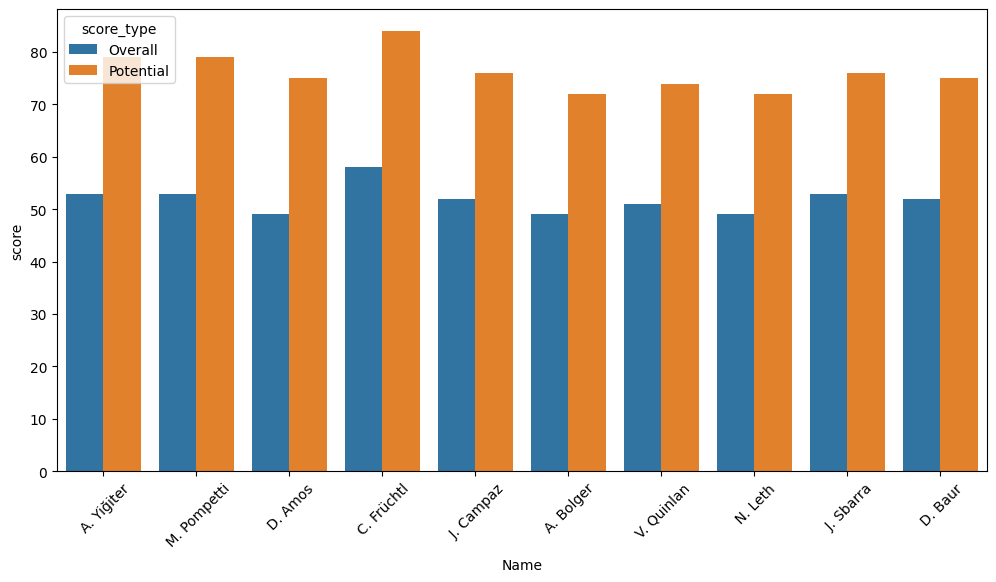

In [33]:
# Checking Players with Scope of Improvement
df['Improvement']= df['Potential']-df['Overall']
top10 = df.sort_values(by='Improvement', ascending=False).head(10)
top10_melted=top10.melt(id_vars=['Name'], value_vars=['Overall', 'Potential'],var_name='score_type', value_name='score')
plt.figure(figsize=(12,6))
sns.barplot(data=top10_melted, x='Name', y='score', hue='score_type')
plt.xticks(rotation=45)

<Axes: xlabel='Wage'>

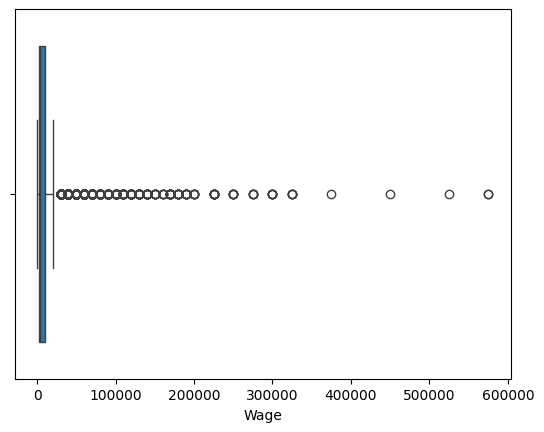

In [34]:
# outliers in Wage
sns.boxplot(x=df['Wage'])

<Axes: xlabel='Wage', ylabel='Count'>

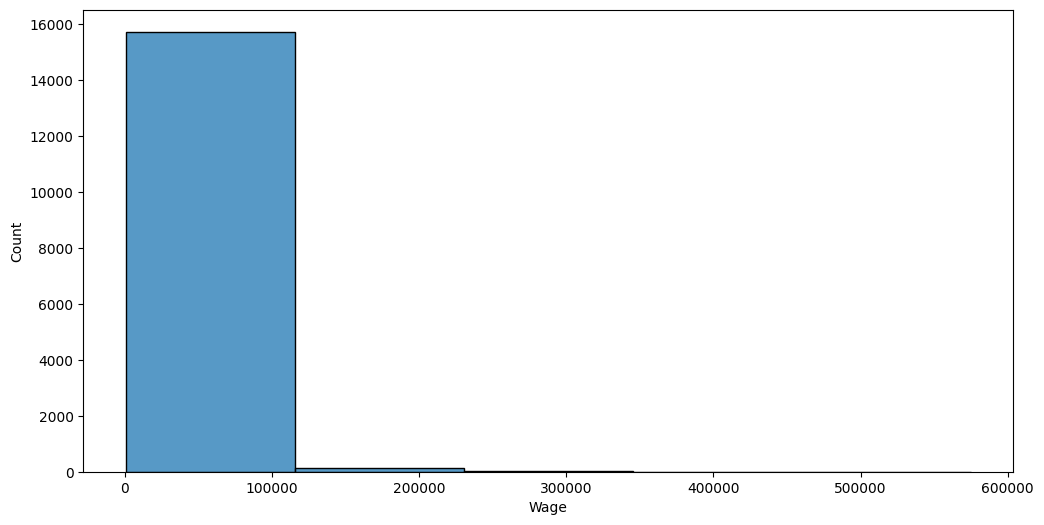

In [35]:
# distribution of Wages
plt.figure(figsize=(12,6))
sns.histplot(df['Wage'], bins=5)

<Axes: xlabel='Value', ylabel='Count'>

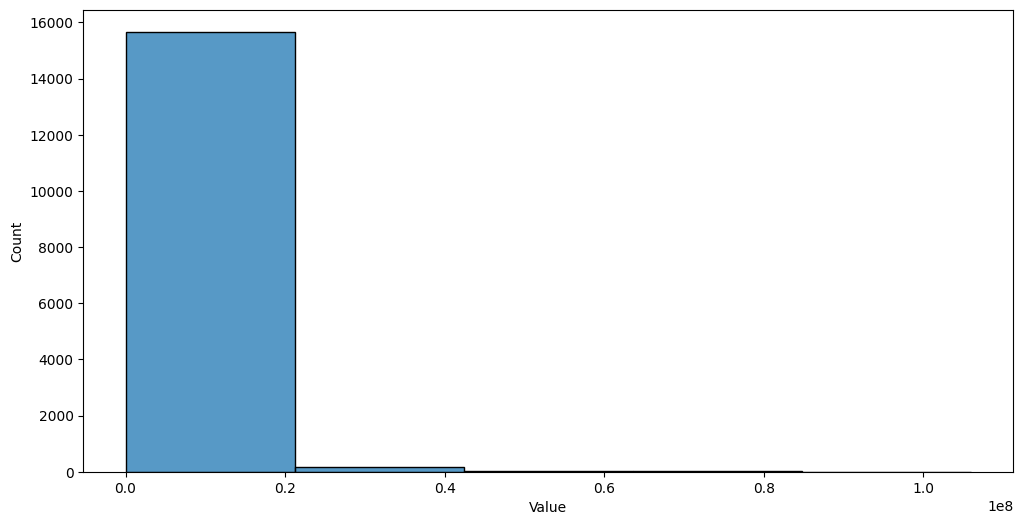

In [36]:
# distribution of Value
plt.figure(figsize=(12,6))
sns.histplot(df['Value'], bins=5)

/tmp/ipython-input-2091051443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name',y='goalkeepers',data=top_10_goalkeepers, palette='viridis')


<Axes: xlabel='Name', ylabel='goalkeepers'>

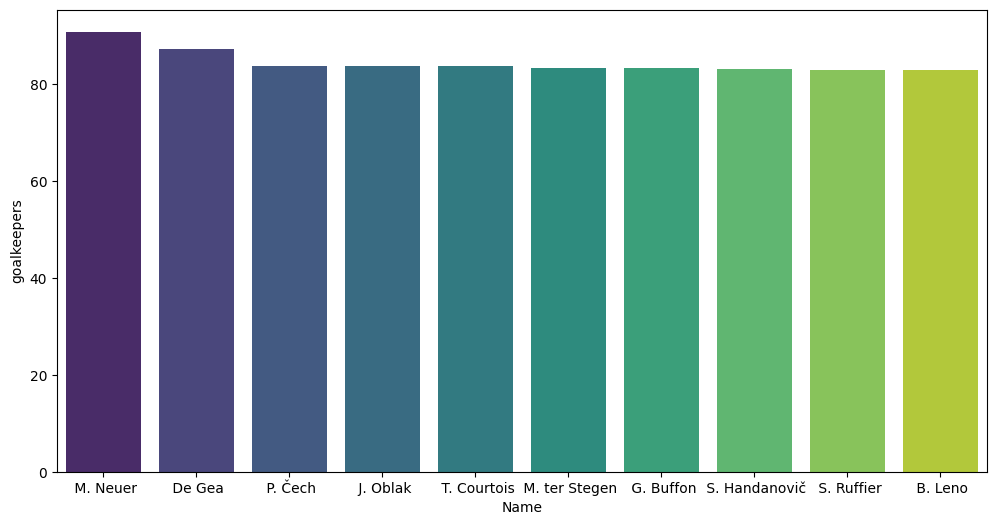

In [37]:
# Finding the Best Goalkeepers using Stats
df['goalkeepers']=df[['GKReflexes','GKPositioning','GKKicking','GKHandling','GKDiving']].mean(axis=1)
top_10_goalkeepers=df.sort_values(by='goalkeepers', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Name',y='goalkeepers',data=top_10_goalkeepers, palette='viridis')

/tmp/ipython-input-859321137.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name',y='defense',data=best_defenders, palette='viridis')


<Axes: xlabel='Name', ylabel='defense'>

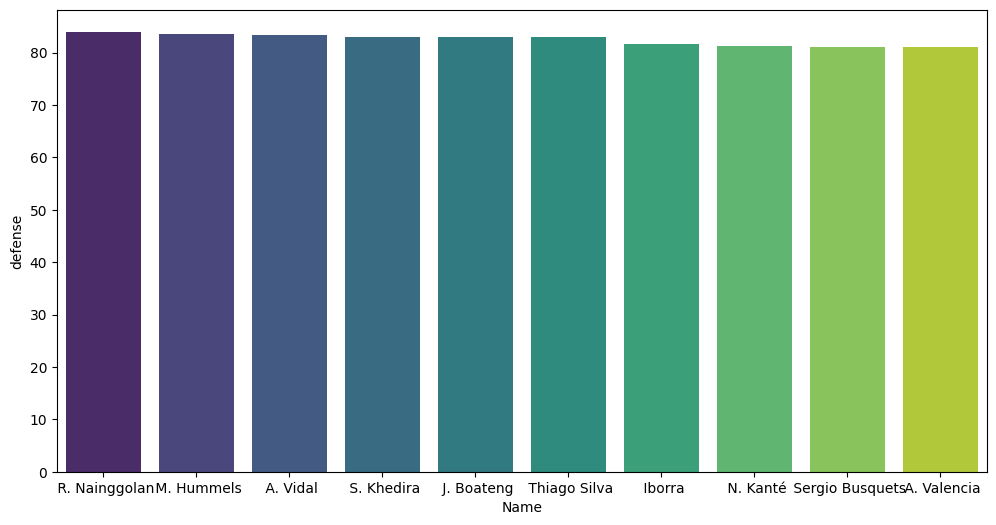

In [38]:
# Finding the Best Defender
df['defense']=df[['SlidingTackle','StandingTackle','Marking','Composure','Positioning','Interceptions','Strength']].mean(axis=1)
best_defenders=df.sort_values(by='defense',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Name',y='defense',data=best_defenders, palette='viridis')


In [39]:
# Similarly for all Player Positions

In [40]:
df['Best Position'].unique()

array(['ST', 'CDM', 'LB', 'CAM', 'RB', 'LWB', 'CM', 'RWB', 'RM', 'LM',
       'CB', 'LW', 'CF', 'RW', 'GK'], dtype=object)

In [41]:
df18 = pd.read_csv('FIFA18_official_data.csv', on_bad_lines='skip')
df19 = pd.read_csv('FIFA19_official_data.csv', on_bad_lines='skip')
df20 = pd.read_csv('FIFA20_official_data.csv', on_bad_lines='skip')
df21 = pd.read_csv('FIFA21_official_data.csv', on_bad_lines='skip')
df22 = pd.read_csv('FIFA22_official_data.csv', on_bad_lines='skip')
df23 = pd.read_csv('FIFA23_official_data.csv', on_bad_lines='skip')
df18=df18.drop(columns=['Club Logo','Photo','ID','Flag'],axis=1)
df19=df19.drop(columns=['Club Logo','Photo','ID','Flag'],axis=1)
df20=df20.drop(columns=['Club Logo','Photo','ID','Flag'],axis=1)
df21=df21.drop(columns=['Club Logo','Photo','ID','Flag'],axis=1)
df22=df22.drop(columns=['Club Logo','Photo','ID','Flag'],axis=1)
df23=df23.drop(columns=['Club Logo','Photo','ID','Flag'],axis=1)

In [42]:
df19.isnull().mean()*100

,0
Name,0.000000
Age,0.000000
Nationality,0.000000
Overall,0.000000
Potential,0.000000
Club,1.326423
Value,0.000000
Wage,0.000000
Special,0.000000
Preferred Foot,0.000000


In [43]:
df18 = df18.drop(columns=['Loaned From'], axis=1)
df19 = df19.drop(columns=['Loaned From'], axis=1)
df20 = df20.drop(columns=['Loaned From'], axis=1)
df21 = df21.drop(columns=['Loaned From'], axis=1)
df22 = df22.drop(columns=['Loaned From'], axis=1)
df23 = df23.drop(columns=['Loaned From'], axis=1)

In [44]:
df18 = df18.dropna(subset=['Club', 'Contract Valid Until', 'Joined', 'Position', 'Jersey Number', 'Release Clause'])
df19 = df19.dropna(subset=['Club', 'Contract Valid Until', 'Joined', 'Position', 'Jersey Number', 'Release Clause'])
df20 = df20.dropna(subset=['Club', 'Contract Valid Until', 'Joined', 'Position', 'Jersey Number', 'Release Clause'])
df21 = df21.dropna(subset=['Club', 'Contract Valid Until', 'Joined', 'Position', 'Jersey Number', 'Release Clause'])
df22 = df22.dropna(subset=['Club', 'Contract Valid Until', 'Joined', 'Position', 'Jersey Number', 'Release Clause'])
#df23 = df23.dropna(subset=['Club', 'Contract Valid Until', 'Joined', 'Position', 'Jersey Number', 'Release Clause'])

In [45]:
rating17=df[['Name','Best Overall Rating']]
rating18=df18[['Name','Best Overall Rating']]
rating17_18=pd.merge(rating17, rating18, on='Name', how='inner', suffixes=('_17','_18'))
rating17_18['Change']=rating17_18['Best Overall Rating_18']-rating17_18['Best Overall Rating_17']
rating17_18.sample(5)

,Name,Best Overall Rating_17,Best Overall Rating_18,Change
11939,A. Pearce,50.0,70.0,20.0
7392,M. Blair,63.0,63.0,0.0
6544,J. Vuković,75.0,74.0,-1.0
1873,M. Martin,68.0,71.0,3.0
9036,Igor Rossi,65.0,66.0,1.0


/tmp/ipython-input-1929047403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name',y='Change',data=rating_change, palette='viridis')


<Axes: xlabel='Name', ylabel='Change'>

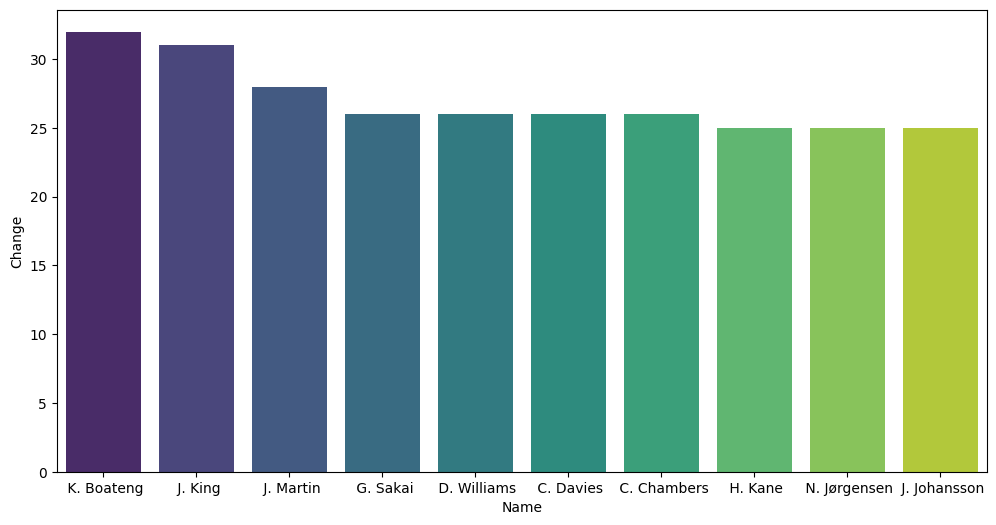

In [46]:
# Plotting Players with Improvement
rating_change=rating17_18.sort_values(by='Change', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Name',y='Change',data=rating_change, palette='viridis')

<Axes: xlabel='Preferred Foot', ylabel='Best Overall Rating'>

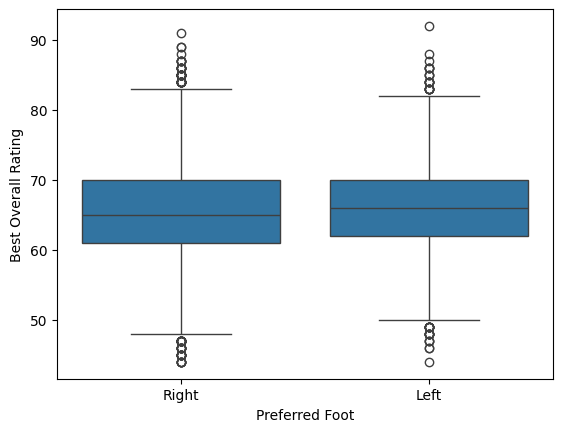

In [47]:
sns.boxplot(x='Preferred Foot',y='Best Overall Rating', data=df)


In [48]:
df['Value']

,Value
0,83000000
1,37500000
2,41500000
3,41500000
4,71500000
...,...
17555,130000
17556,90000
17557,100000
17558,60000


In [49]:
years=[ df18, df19, df20, df21, df22]
for i in range(len(years)):
   years[i]['Value']=years[i]['Value'].apply(parse_value)
   years[i]['Wage']=years[i]['Wage'].apply(parse_value)

In [50]:
dfs = {
    2017: df[['Name', 'Value']],
    2018: df18[['Name', 'Value']],
    2019: df19[['Name', 'Value']],
    2020: df20[['Name', 'Value']],
    2021: df21[['Name', 'Value']],
    }

players_values = dfs[2017].rename(columns={'Value': 'Value_2017'})
for year, di in list(dfs.items())[1:]:
    players_values = players_values.merge(
        di.rename(columns={'Value': f'Value_{year}'}),
        on='Name',
        how='inner'
    )

players_values['Value Change']=players_values['Value_2021']-players_values['Value_2017']
players_values = players_values.drop_duplicates(subset=['Name'], keep='first')
players_values.sort_values(by='Value Change', ascending=False).head(10)

,Name,Value_2017,Value_2018,Value_2019,Value_2020,Value_2021,Value Change
14374,T. Alexander-Arnold,1500000,9500000,19000000,46000000,60000000,58500000
25068,K. Havertz,2500000,14000000,35500000,48500000,57000000,54500000
4131,S. Mané,26000000,37000000,54000000,80500000,78000000,52000000
4514,M. Salah,26000000,63000000,71500000,80500000,78000000,52000000
4495,V. van Dijk,25500000,31500000,67000000,90000000,75500000,50000000
8402,A. Robertson,4300000,14000000,29000000,49000000,53000000,48700000
14777,F. de Jong,1900000,10500000,42000000,60000000,50500000,48600000
6133,T. Werner,1900000,34500000,40000000,57500000,49500000,47600000
53730,Alisson,16500000,31000000,46000000,64500000,62500000,46000000
14897,M. de Ligt,3600000,16500000,44000000,47500000,49500000,45900000


<Axes: xlabel='Year', ylabel='Value'>

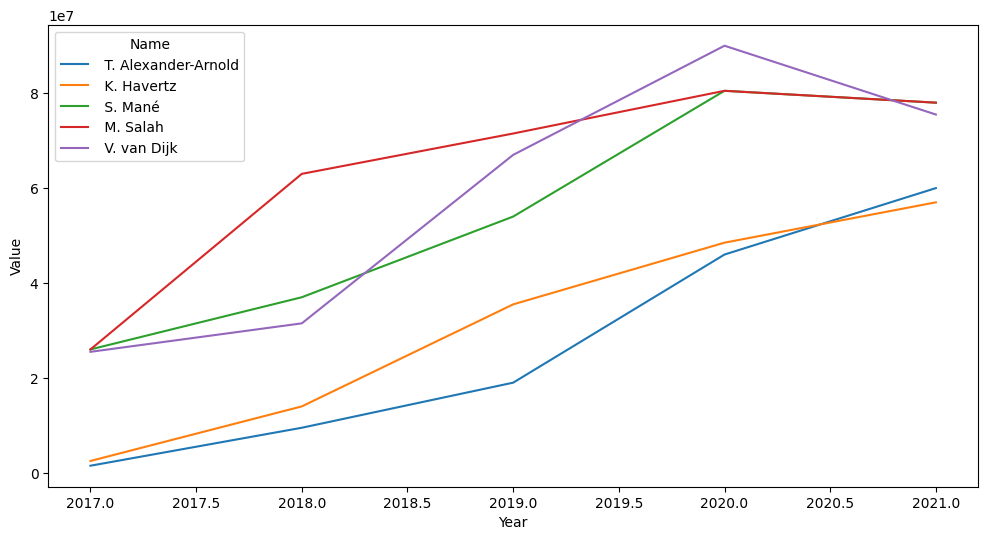

In [51]:
top10_value_change=players_values.sort_values(by='Value Change', ascending=False).head(5)
top10_value_change=top10_value_change.melt(id_vars='Name', value_vars=['Value_2017','Value_2018','Value_2019','Value_2020','Value_2021'], var_name='Year', value_name='Value')
top10_value_change['Year']=top10_value_change['Year'].str.replace("Value_","").astype(int)
plt.figure(figsize=(12,6))
sns.lineplot(top10_value_change, x='Year', y='Value', hue='Name')

In [52]:
numeric_cols= df.select_dtypes(exclude=['object','datetime'])
numeric_cols.corr()['Best Overall Rating'].sort_values(ascending=False).head(10)

,Best Overall Rating
Best Overall Rating,1.000000
Overall,0.991779
Reactions,0.835148
Potential,0.686356
Special,0.644137
Composure,0.628615
Value,0.578441
Wage,0.576547
ShortPassing,0.527170
Vision,0.515102


In [53]:
numeric_cols.corr()['Best Overall Rating'].sort_values(ascending=True).head(10)

,Best Overall Rating
Improvement,-0.537702
Jersey Number,-0.218097
GKKicking,-0.060752
GKDiving,-0.056532
goalkeepers,-0.054017
GKReflexes,-0.051500
GKHandling,-0.050142
GKPositioning,-0.047751
Height,0.018417
Contract Valid Until,0.047301


In [54]:
df20.isnull().mean()*100

,0
Name,0.000000
Age,0.000000
Nationality,0.000000
Overall,0.000000
Potential,0.000000
Club,0.000000
Value,0.000000
Wage,0.000000
Special,0.000000
Preferred Foot,0.000000


**Buiding the Model to Predict**
1. Rating Based on All Numerically Important Columns


In [55]:
model1_data=pd.read_csv('FIFA18_official_data.csv')
model1_data.info()
model1_data['Value']=model1_data['Value'].apply(parse_value)
model1_data['Wage']=model1_data['Wage'].apply(parse_value)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17927 entries, 0 to 17926
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17927 non-null  int64  
 1   Name                      17927 non-null  object 
 2   Age                       17927 non-null  int64  
 3   Photo                     17927 non-null  object 
 4   Nationality               17927 non-null  object 
 5   Flag                      17927 non-null  object 
 6   Overall                   17927 non-null  int64  
 7   Potential                 17927 non-null  int64  
 8   Club                      17675 non-null  object 
 9   Club Logo                 17927 non-null  object 
 10  Value                     17927 non-null  object 
 11  Wage                      17927 non-null  object 
 12  Special                   17927 non-null  int64  
 13  Preferred Foot            17927 non-null  object 
 14  Intern

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

In [57]:
model1_data.isnull().mean()*100

,0
ID,0.000000
Name,0.000000
Age,0.000000
Photo,0.000000
Nationality,0.000000
...,...
GKPositioning,0.000000
GKReflexes,0.000000
Best Position,0.000000
Best Overall Rating,0.000000


In [58]:
model1_data.info()
model1_data=model1_data.drop(columns=['Club Logo','Photo','ID','Flag','Loaned From'],axis=1)
# Dropping only null values of Jersey Number for now for the Linear Model
model1_data['Jersey Number']=model1_data['Jersey Number'].fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17927 entries, 0 to 17926
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17927 non-null  int64  
 1   Name                      17927 non-null  object 
 2   Age                       17927 non-null  int64  
 3   Photo                     17927 non-null  object 
 4   Nationality               17927 non-null  object 
 5   Flag                      17927 non-null  object 
 6   Overall                   17927 non-null  int64  
 7   Potential                 17927 non-null  int64  
 8   Club                      17675 non-null  object 
 9   Club Logo                 17927 non-null  object 
 10  Value                     17927 non-null  int64  
 11  Wage                      17927 non-null  int64  
 12  Special                   17927 non-null  int64  
 13  Preferred Foot            17927 non-null  object 
 14  Intern

In [59]:
# Unsure about Jersey number, try with and without
X=model1_data[['Overall','Reactions','Potential','Special','Composure','Value','Wage','Jersey Number','GKKicking','GKHandling','GKPositioning','GKReflexes']]
y=model1_data['Best Overall Rating']


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape

(14341, 12)

In [65]:
y_train.shape

(14341,)

In [66]:
lr=LinearRegression()
dt=DecisionTreeClassifier()

In [67]:
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
lr_pred=lr.predict(X_test)
mae=mean_absolute_error(y_test, lr_pred)
mae

0.5604418336764502

In [70]:
dt_pred=dt.predict(X_test)
mae=mean_absolute_error(y_test, dt_pred)
mae

0.628276631344116

In [71]:
del X_train, X_test, y_train, y_test

In [72]:
# Now removing COlumns Overall and Jersey Number
X2=model1_data[['Reactions','Potential','Special','Composure','Value','Wage','GKKicking','GKHandling','GKPositioning','GKReflexes']]
y2=model1_data['Best Overall Rating']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
lr2=LinearRegression()
dt2=DecisionTreeClassifier()
lr2.fit(X_train, y_train)
dt2.fit(X_train, y_train)
lr_pred2=lr2.predict(X_test)
mae2=mean_absolute_error(y_test, lr_pred2)
mae2

2.0076470027536666

In [73]:
dt2_pred=dt2.predict(X_test)
mae2=mean_absolute_error(y_test, dt2_pred)
mae2

1.111266034578918




2.   Finding player Position Based on various Skills



In [74]:
model2_data=pd.read_csv('FIFA18_official_data.csv')

In [75]:
model2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17927 entries, 0 to 17926
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17927 non-null  int64  
 1   Name                      17927 non-null  object 
 2   Age                       17927 non-null  int64  
 3   Photo                     17927 non-null  object 
 4   Nationality               17927 non-null  object 
 5   Flag                      17927 non-null  object 
 6   Overall                   17927 non-null  int64  
 7   Potential                 17927 non-null  int64  
 8   Club                      17675 non-null  object 
 9   Club Logo                 17927 non-null  object 
 10  Value                     17927 non-null  object 
 11  Wage                      17927 non-null  object 
 12  Special                   17927 non-null  int64  
 13  Preferred Foot            17927 non-null  object 
 14  Intern

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X3 = model2_data.iloc[:, 27:61]
y3 = model2_data['Best Position']
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         CAM       0.71      0.80      0.75       448
          CB       0.87      0.96      0.91       681
         CDM       0.73      0.81      0.77       276
          CF       0.00      0.00      0.00         7
          CM       0.62      0.66      0.64       212
          GK       1.00      1.00      1.00       384
          LB       0.41      0.26      0.32       149
          LM       0.42      0.03      0.06       169
          LW       0.00      0.00      0.00        37
         LWB       0.27      0.14      0.19        64
          RB       0.41      0.54      0.47       177
          RM       0.53      0.66      0.58       337
          RW       0.50      0.06      0.11        50
         RWB       0.36      0.12      0.18        67
          ST       0.85      0.96      0.90       528

    accuracy                           0.74      3586
   macro avg       0.51      0.47      0.46      3586
weighted avg       0.70   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
